In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
# import statsmodels.api as sm
# import statsmodels.formula.api as smf
from scipy.stats import f_oneway

Loading Excel dataset

In [121]:
file_path = "BlinkIT Dataset Excel.xlsx"
df = pd.read_excel(file_path, sheet_name="BlinkIT Grocery Data")

Dataset

In [123]:
df

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,low fat,NCT53,Health and Hygiene,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0


In [124]:
print(df.shape)
print(df.info())
df.head()

(8523, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None


,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [125]:
df.describe(include="all")

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
count,8523,8523,8523,8523.000000,8523,8523,8523,8523,8523.000000,7060.000000,8523.000000,8523.000000
unique,5,1559,16,NaN,10,3,3,4,NaN,NaN,NaN,NaN
top,Low Fat,FDW13,Fruits and Vegetables,NaN,OUT027,Tier 3,Medium,Supermarket Type1,NaN,NaN,NaN,NaN
freq,5089,10,1232,NaN,935,3350,3631,5577,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2016.450546,NaN,NaN,NaN,NaN,0.066132,12.857645,140.992783,3.965857
std,NaN,NaN,NaN,3.189396,NaN,NaN,NaN,NaN,0.051598,4.643456,62.275067,0.605651
min,NaN,NaN,NaN,2011.000000,NaN,NaN,NaN,NaN,0.000000,4.555000,31.290000,1.000000
25%,NaN,NaN,NaN,2014.000000,NaN,NaN,NaN,NaN,0.026989,8.773750,93.826500,4.000000
50%,NaN,NaN,NaN,2016.000000,NaN,NaN,NaN,NaN,0.053931,12.600000,143.012800,4.000000
75%,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN,0.094585,16.850000,185.643700,4.200000


Data cleaning

In [139]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Missing values
print(df.isnull().sum())

# Drop 
df = df.dropna()  
df

item_fat_content             0
item_identifier              0
item_type                    0
outlet_establishment_year    0
outlet_identifier            0
outlet_location_type         0
outlet_size                  0
outlet_type                  0
item_visibility              0
item_weight                  0
sales                        0
rating                       0
dtype: int64


,item_fat_content,item_identifier,item_type,outlet_establishment_year,outlet_identifier,outlet_location_type,outlet_size,outlet_type,item_visibility,item_weight,sales,rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8241,reg,FDH26,Canned,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.034841,19.25,141.1496,4.0
8242,reg,FDG56,Fruits and Vegetables,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.071744,13.30,59.7536,4.0
8243,reg,FDM15,Meat,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.057655,11.80,152.6366,4.0
8244,reg,FDX57,Snack Foods,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.047459,17.25,95.8068,4.0


Statistical Analysis

In [143]:
print(df.columns.tolist())


['item_fat_content', 'item_identifier', 'item_type', 'outlet_establishment_year', 'outlet_identifier', 'outlet_location_type', 'outlet_size', 'outlet_type', 'item_visibility', 'item_weight', 'sales', 'rating']


Mean Sales: 141.24068495750706
Median Sales: 142.7299
Std Dev: 62.4118879590454


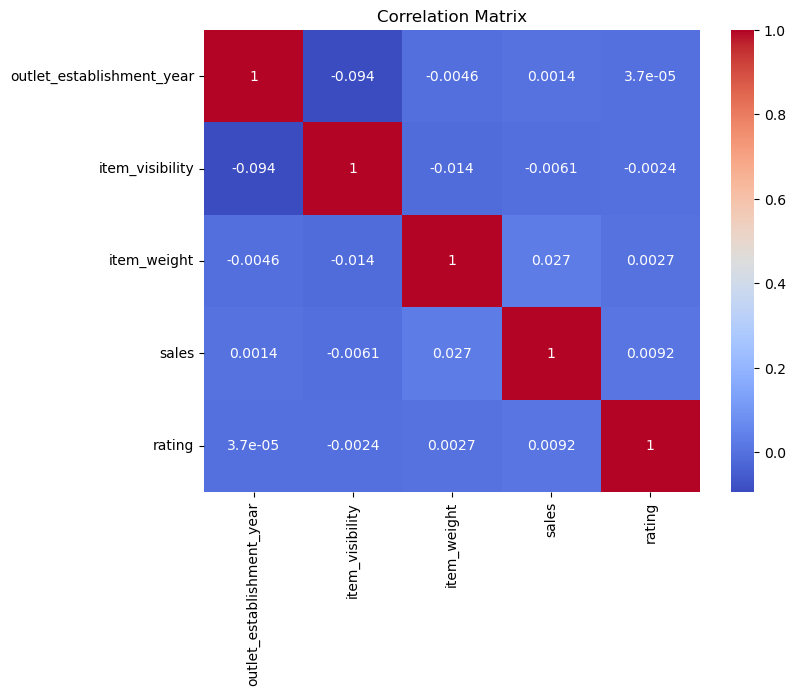

item_type
Baking Goods             126.097226
Health and Hygiene       131.125121
Soft Drinks              131.803941
Others                   135.945964
Hard Drinks              138.041647
Frozen Foods             139.222677
Canned                   139.244898
Meat                     139.940359
Breads                   140.505808
Breakfast                142.653791
Fruits and Vegetables    144.444517
Seafood                  145.050282
Snack Foods              146.709646
Starchy Foods            147.692132
Household                149.156972
Dairy                    149.340100
Name: sales, dtype: float64


In [145]:
# Summary stats
print("Mean Sales:", df['sales'].mean())
print("Median Sales:", df['sales'].median())
print("Std Dev:", df['sales'].std())

# Correlation matrix
corr = df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Category-wise sales
category_sales = df.groupby("item_type")['sales'].mean().sort_values()
print(category_sales)

Visualizations

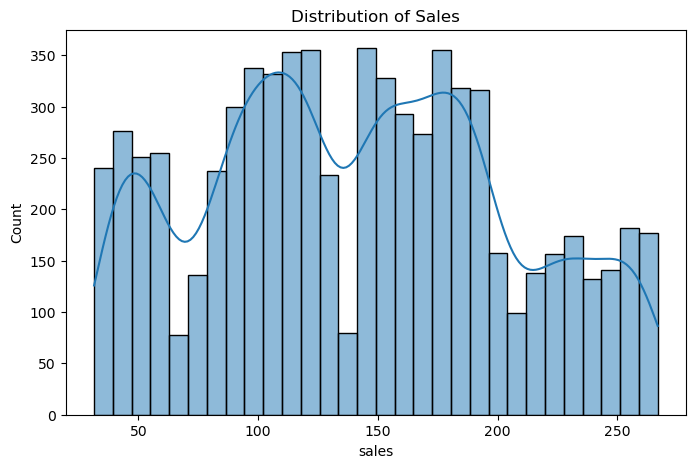

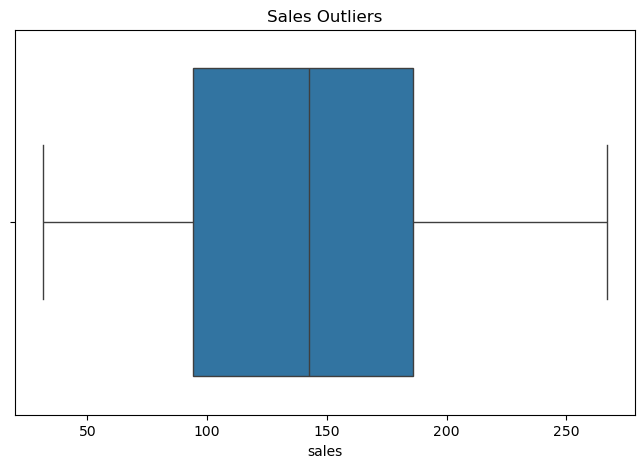

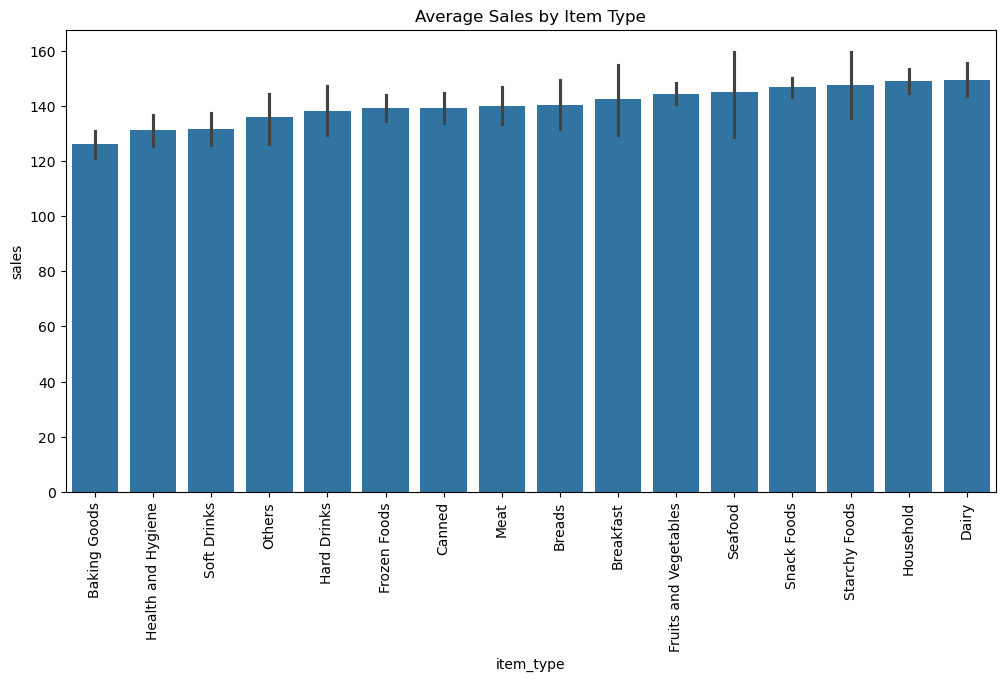

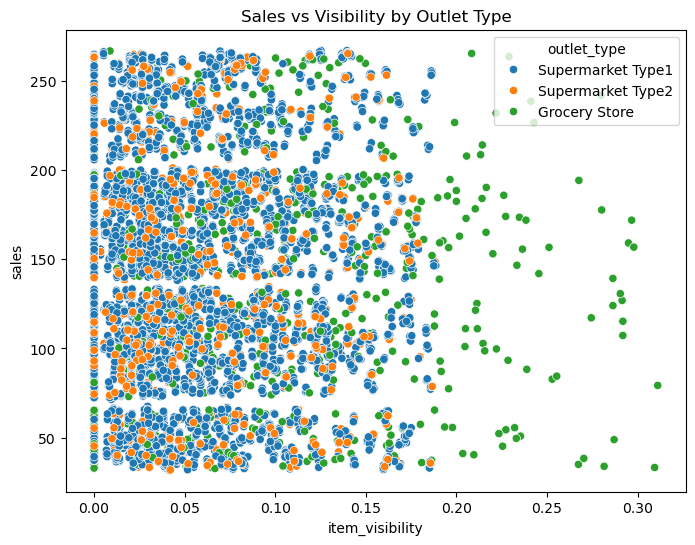

In [147]:
# Histogram of Sales
plt.figure(figsize=(8,5))
sns.histplot(df['sales'], bins=30, kde=True)
plt.title("Distribution of Sales")
plt.show()

# Boxplot for Outliers
plt.figure(figsize=(8,5))
sns.boxplot(x=df['sales'])
plt.title("Sales Outliers")
plt.show()

# Sales by Item Type
plt.figure(figsize=(12,6))
sns.barplot(x="item_type", y="sales", data=df, estimator=np.mean, order=category_sales.index)
plt.xticks(rotation=90)
plt.title("Average Sales by Item Type")
plt.show()

# Sales vs Item Visibility
plt.figure(figsize=(8,6))
sns.scatterplot(x="item_visibility", y="sales", hue="outlet_type", data=df)
plt.title("Sales vs Visibility by Outlet Type")
plt.show()


Hypothesis Testing

In [149]:
# Does outlet size affect sales?
small = df[df['outlet_size']=="Small"]['sales']
medium = df[df['outlet_size']=="Medium"]['sales']

t_stat, p_val = stats.ttest_ind(small, medium, equal_var=False)
print("T-test between Small & Medium outlets")
print("T-statistic:", t_stat, " P-value:", p_val)


T-test between Small & Medium outlets
T-statistic: 1.2733697043458254  P-value: 0.20294272021814858


ANOVA Test (sales differences across multiple groups)

In [153]:
# Group sales by outlet size
small = df[df['outlet_size']=="Small"]['sales']
medium = df[df['outlet_size']=="Medium"]['sales']
high = df[df['outlet_size']=="High"]['sales']

# Perform one-way ANOVA
f_stat, p_val = f_oneway(small, medium, high)
print("ANOVA on Sales by Outlet Size")
print("F-statistic:", f_stat, " P-value:", p_val)

ANOVA on Sales by Outlet Size
F-statistic: 1.0006931156545271  P-value: 0.36767670619787113


In [155]:
# Get sales groups by item type
groups = [group["sales"].values for name, group in df.groupby("item_type")]

# Run ANOVA
f_stat, p_val = f_oneway(*groups)
print("ANOVA on Sales by Item Type")
print("F-statistic:", f_stat, " P-value:", p_val)

ANOVA on Sales by Item Type
F-statistic: 5.927038474234456  P-value: 1.944515145994279e-12


C:\Users\sriji\AppData\Local\Temp\ipykernel_9660\3036760650.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="outlet_size", y="sales", data=df, palette="Set2")


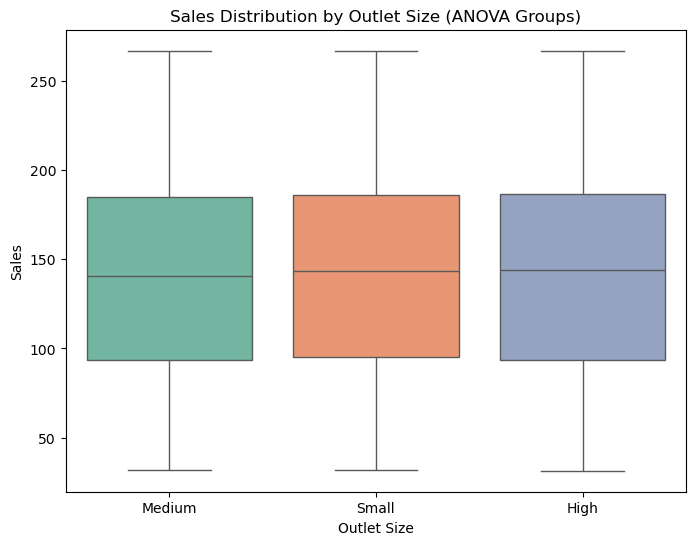

In [157]:
#Sales by Outlet Size
plt.figure(figsize=(8,6))
sns.boxplot(x="outlet_size", y="sales", data=df,   hue="outlet_size", 
    palette="Set2", 
    legend=False)

# Annotate with p-value
plt.text(1, df['sales'].max()*0.95, f"ANOVA p-value = {p_val:.4f}", 
         ha='center', fontsize=12, color="blue")

plt.title("Sales Distribution by Outlet Size (with ANOVA p-value)")
plt.xlabel("Outlet Size")
plt.ylabel("Sales")
plt.show()


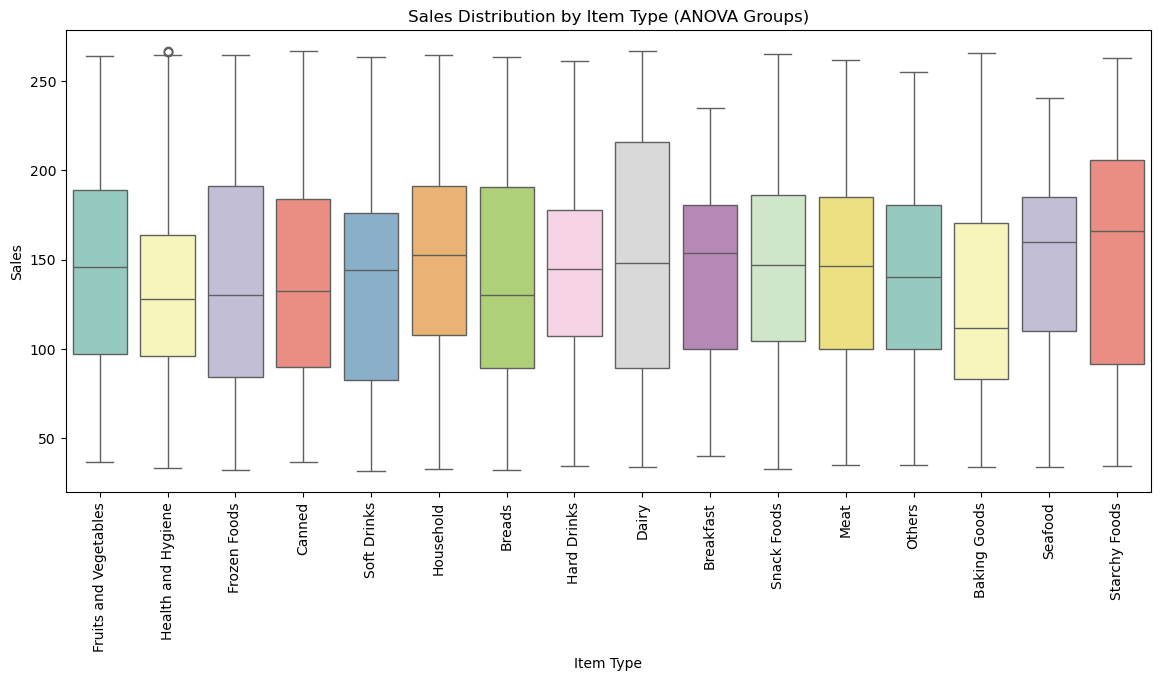

In [173]:
##Sales by Item Type
plt.figure(figsize=(14,6))
sns.boxplot(x="item_type", y="sales", data=df,hue="item_type", palette="Set3")
plt.xticks(rotation=90)
plt.title("Sales Distribution by Item Type (ANOVA Groups)")
plt.xlabel("Item Type")
plt.ylabel("Sales")
plt.show()


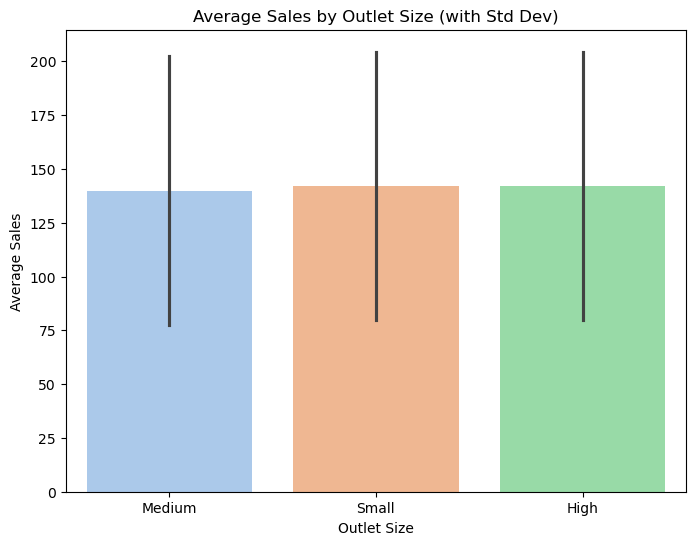

In [167]:
#Barplot with Error Bars (Mean ± Standard Deviation)
plt.figure(figsize=(8,6))
sns.barplot(x="outlet_size", y="sales", data=df,   errorbar="sd",
    hue="outlet_size",   
    palette="pastel", 
    legend=False    )
plt.title("Average Sales by Outlet Size (with Std Dev)")
plt.xlabel("Outlet Size")
plt.ylabel("Average Sales")
plt.show()
